In [1]:
import pandas as pd
import numpy as np
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# Import ExponentialSmoothing
from statsmodels.tsa.api import ExponentialSmoothing

# CoverMyMeds challenge

>At CoverMyMeds, time series analysis forms the backbone of the financial projections we make at the beginning of each fiscal year and helps us set realistic but challenging company goals.  Many of our products have multiple customers whose behaviors might (or might not) influence each other.  We are presenting daily volume (can be thought of as purchases) of one product for three customers. Questions that you should answer in this project are the following: 
>
>1. What trends are in the data at the daily, monthly, and yearly levels?
>2. What variables do and do not affect daily volume?
>3. How does the behavior of one customer affect the behavior of the other customers?
>4. How accurately can you predict what will happen in 2019 at the monthly and yearly levels?
>5. How accurate are your projections 1 month, 3 months, and 6 months after the  day they were forecasted from?


In [3]:
df = pq.read_table(source='cmm_erdos_bootcamp_2020_timeseries.pq').to_pandas()

In [5]:
df.tail()

,date_val,calendar_year,calendar_month,calendar_day,day_of_week,is_weekday,is_workday,is_holiday,volume_A,volume_B,volume_C
1090,2019-12-27,2019,12,27,6,1,1,0,8362,3650,3661
1091,2019-12-28,2019,12,28,7,0,0,0,2906,1298,1232
1092,2019-12-29,2019,12,29,1,0,0,0,3024,1357,1349
1093,2019-12-30,2019,12,30,2,1,1,0,7444,3690,3690
1094,2019-12-31,2019,12,31,3,1,1,0,8324,3971,4062


In [6]:
df['date_val'] = pd.to_datetime(df['date_val'])
#df['calendar_year'] = pd.to_datetime(df['calendar_year'])

In [7]:
df.head()

,date_val,calendar_year,calendar_month,calendar_day,day_of_week,is_weekday,is_workday,is_holiday,volume_A,volume_B,volume_C
0,2017-01-01,2017,1,1,1,0,0,1,974,701,574
1,2017-01-02,2017,1,2,2,1,0,0,5073,2976,3149
2,2017-01-03,2017,1,3,3,1,1,0,6710,4249,3595
3,2017-01-04,2017,1,4,4,1,1,0,5746,3942,3651
4,2017-01-05,2017,1,5,5,1,1,0,5863,4279,3792


In [104]:
df['is_weekday']

0       0
1       1
2       1
3       1
4       1
       ..
1090    1
1091    0
1092    0
1093    1
1094    1
Name: is_weekday, Length: 1095, dtype: int64

### Explore the data to find trends at:
* Daily Level ['day_of_week']
* Monthly Level ['calendar_month']
* Yearly Level [ 'calendar_year']

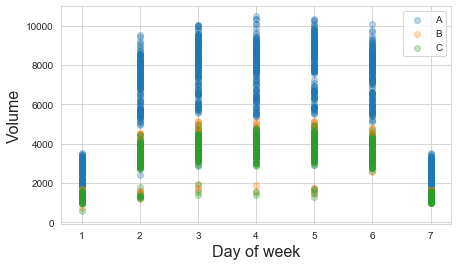

In [124]:
plt.figure(figsize=(7,4))

plt.scatter(df['day_of_week'], df['volume_A'], label="A" ,alpha=0.3)
plt.scatter(df['day_of_week'], df['volume_B'], label="B" ,alpha=0.3)
plt.scatter(df['day_of_week'], df['volume_C'], label="C" ,alpha=0.3)

plt.xlabel("Day of week", fontsize=16)
plt.ylabel("Volume", fontsize=16)

plt.legend()

plt.show()

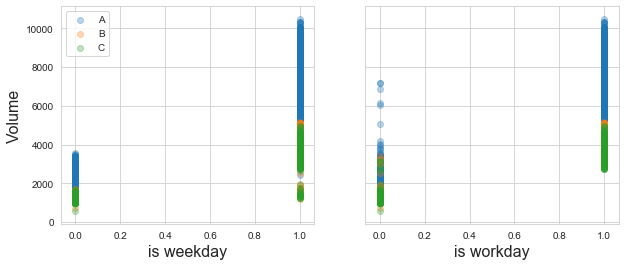

In [121]:
fig, ax = plt.subplots(1,2,figsize=(10,4), sharey=True)

ax[0].scatter(df['is_weekday'], df['volume_A'], label="A" ,alpha=0.3)
ax[0].scatter(df['is_weekday'], df['volume_B'], label="B" ,alpha=0.3)
ax[0].scatter(df['is_weekday'], df['volume_C'], label="C" ,alpha=0.3)
ax[0].set_xlabel("is weekday", fontsize=16)

ax[1].scatter(df['is_workday'], df['volume_A'], label="A" ,alpha=0.3)
ax[1].scatter(df['is_workday'], df['volume_B'], label="B" ,alpha=0.3)
ax[1].scatter(df['is_workday'], df['volume_C'], label="C" ,alpha=0.3)
ax[1].set_xlabel("is workday", fontsize=16)

ax[0].set_ylabel("Volume", fontsize=16)

ax[0].legend()

plt.show()

> **Trend:** I see that most of the purchases are done toward the middle of the week due to the increase in days 3,4, and 5. 

>Also, most purchases are done on weekdays, and workdays.

In [147]:
len((df['calendar_month'][(df['calendar_year']==2017)&(df['calendar_month']==1)]))

31

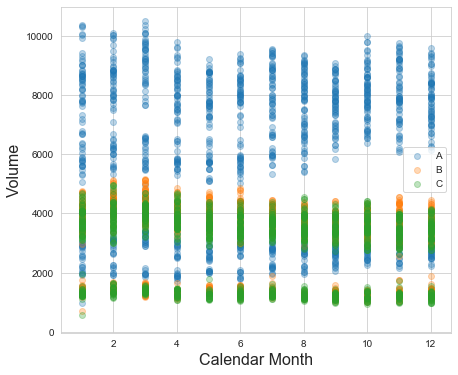

In [149]:
plt.figure(figsize=(7,6))

plt.scatter(df['calendar_month'], df['volume_A'], label="A" ,alpha=0.3)
plt.scatter(df['calendar_month'], df['volume_B'], label="B" ,alpha=0.3)
plt.scatter(df['calendar_month'], df['volume_C'], label="C" ,alpha=0.3)

plt.xlabel("Calendar Month", fontsize=16)
plt.ylabel("Volume", fontsize=16)

plt.legend()

plt.show()

print()

> **Trend:** I notice that most of the purchases are done at the begining of the year: months 1,2, and 3 and they die down towards the end of the year.

In [154]:
len((df['calendar_year'][(df['calendar_year']==2017)]))

365

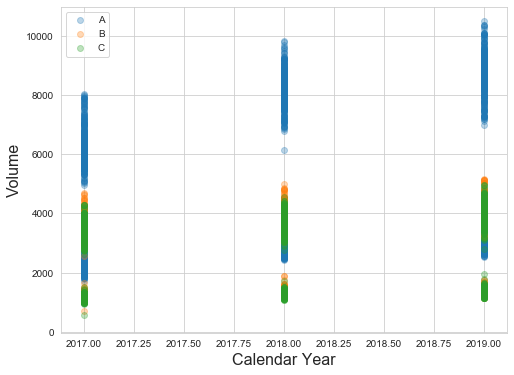

In [152]:
plt.figure(figsize=(8,6))

plt.scatter(df['calendar_year'], df['volume_A'], label="A" ,alpha=0.3)
plt.scatter(df['calendar_year'], df['volume_B'], label="B" ,alpha=0.3)
plt.scatter(df['calendar_year'], df['volume_C'], label="C" ,alpha=0.3)

plt.xlabel("Calendar Year", fontsize=16)
plt.ylabel("Volume", fontsize=16)

plt.legend()

plt.show()

> **Trend:** There ave been more purchases in recent years. So the amount of purcahses has gone up.

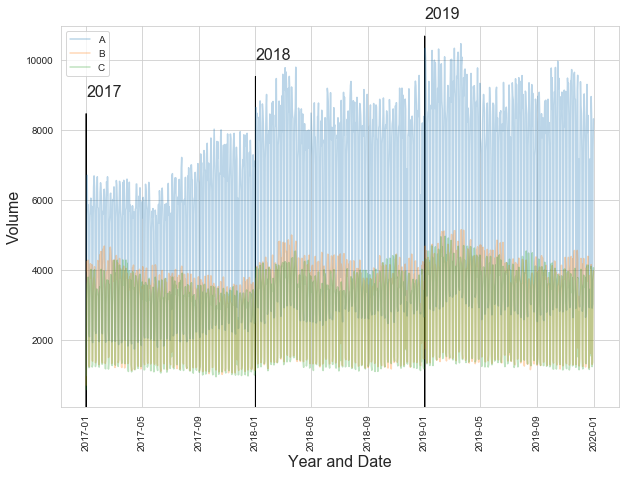

In [231]:
plt.figure(figsize=(10,7))

plt.plot(df['date_val'], df['volume_A'], label="A" ,alpha=0.3)
plt.plot(df['date_val'], df['volume_B'], label="B" ,alpha=0.3)
plt.plot(df['date_val'], df['volume_C'], label="C" ,alpha=0.3)

plt.xlabel("Year and Date", fontsize=16)
plt.ylabel("Volume", fontsize=16)

twenty17 = df['volume_A'][df['date_val'] == pd.Timestamp(2017,1,1)][0]
twenty18 = df['volume_A'][df['date_val'] == pd.Timestamp(2018,1,1)][365]
twenty19 = df['volume_A'][df['date_val'] == pd.Timestamp(2019,1,1)][730]

plt.text(pd.Timestamp(2017,1,1), twenty17+8000, "2017", fontsize=16)
plt.arrow(pd.Timestamp(2017,1,1), twenty17-1000, 0, 8500, width=0.1, shape='left', color="black")

plt.text(pd.Timestamp(2018,1,1), twenty18+7000, "2018", fontsize=16)
plt.arrow(pd.Timestamp(2018,1,1), twenty18-6000, 0, 12500, width=0.1, shape='left', color="black")

plt.text(pd.Timestamp(2019,1,1), twenty19+7000, "2019", fontsize=16)
plt.arrow(pd.Timestamp(2019,1,1), twenty19-6000, 0, 12500, width=0.1, shape='left', color="black")

plt.legend()

plt.xticks(rotation=90)
plt.show()

In [237]:
# Just 2017 data:

twenty17_bool = (df['date_val'] >= pd.Timestamp(2017,1,1))&(df['date_val'] <= pd.Timestamp(2017,12,31))

# Just 2018 data:

twenty18_bool = (df['date_val'] >= pd.Timestamp(2018,1,1))&(df['date_val'] <= pd.Timestamp(2018,12,31))

# Just 2019 data:

twenty19_bool = (df['date_val'] >= pd.Timestamp(2019,1,1))&(df['date_val'] <= pd.Timestamp(2019,12,31))

In [321]:
bool_looking_at = twenty18_bool

A_purchases = 1
B_purchases = 0
C_purchases = 0

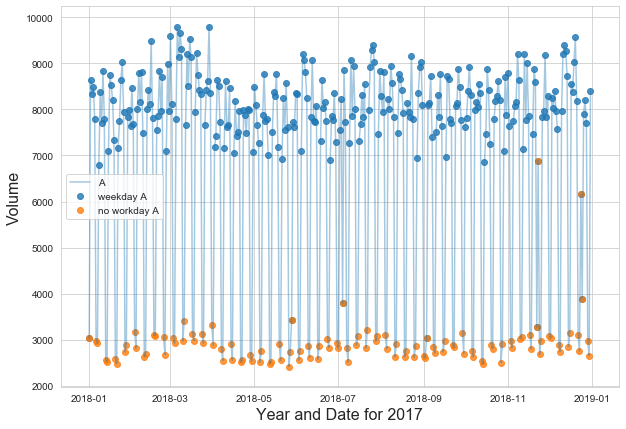

In [322]:
plt.figure(figsize=(10,7))

if A_purchases == True:
    plt.plot(df['date_val'][bool_looking_at], df['volume_A'][bool_looking_at], label="A" ,alpha=0.4)
    plt.scatter(df['date_val'][(bool_looking_at)&(df['is_weekday']==True)], df['volume_A'][(bool_looking_at)&(df['is_weekday']==True)], label='weekday A', alpha=0.8)
    plt.scatter(df['date_val'][(bool_looking_at)&(df['is_workday']==False)], df['volume_A'][(bool_looking_at)&(df['is_workday']==False)], label='no workday A', alpha=0.8)

if B_purchases == True:
    plt.plot(df['date_val'][bool_looking_at], df['volume_B'][bool_looking_at], label="B" ,alpha=0.4)
    plt.scatter(df['date_val'][(bool_looking_at)&(df['is_weekday']==True)], df['volume_B'][(bool_looking_at)&(df['is_weekday']==True)], label='weekday B', alpha=0.8)
    plt.scatter(df['date_val'][(bool_looking_at)&(df['is_workday']==False)], df['volume_B'][(bool_looking_at)&(df['is_workday']==False)], label='no workday B', alpha=0.8)

if C_purchases == True:
    plt.plot(df['date_val'][bool_looking_at], df['volume_C'][bool_looking_at], label="C" ,alpha=0.4)
    plt.scatter(df['date_val'][(bool_looking_at)&(df['is_weekday']==True)], df['volume_C'][(bool_looking_at)&(df['is_weekday']==True)], label='weekday C', alpha=0.8)
    plt.scatter(df['date_val'][(bool_looking_at)&(df['is_workday']==False)], df['volume_C'][(bool_looking_at)&(df['is_workday']==False)], label='no workday C', alpha=0.8)



plt.xlabel("Year and Date for 2017", fontsize=16)
plt.ylabel("Volume", fontsize=16)

plt.legend()


> **For 2017:** I see 2 trends:
>
        > 1. Purhcases increases toward the end of the year          (A)
            > 1.1. Purchases decrease toward end of year             (B, C)
        > 2. There are more purchases on weekdays and workdays       (A, B, C)
>    
> **For 2018:** I see 2 trends:
>
        > 1. Purchases remain ~ the same throughout the year         (A)
            > 1.1 Small spike in March (03)                          (B)
            > 1.2 Small dip in July (07)                             (C)
        > 2. More purchases on weekdays and workdays                 (A, B, C)
>  
> **For 2019:** I see 2 trends:
>
        > 1. Purchases increase slightly the begining of the year    (A, B, C)
        > 2. More purchases on weekdays and workdays                 (A, B, C)

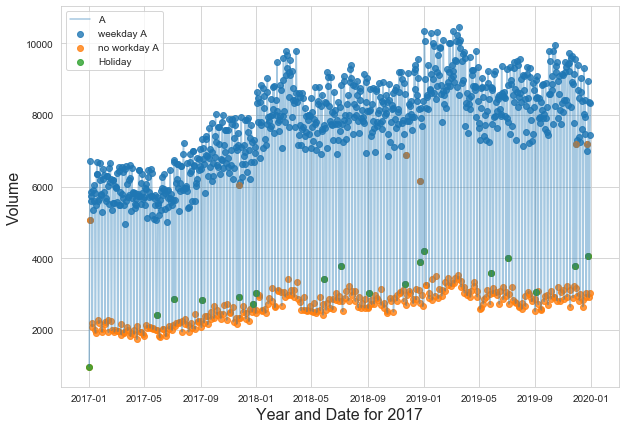

In [332]:
A_purchases = 1
B_purchases = 0
C_purchases = 0


plt.figure(figsize=(10,7))

if A_purchases == True:
    plt.plot(df['date_val'], df['volume_A'], label="A" ,alpha=0.4)
    plt.scatter(df['date_val'][(df['is_weekday']==True)], df['volume_A'][(df['is_weekday']==True)], label='weekday A', alpha=0.8)
    plt.scatter(df['date_val'][(df['is_workday']==False)], df['volume_A'][(df['is_workday']==False)], label='no workday A', alpha=0.8)
    plt.scatter(df['date_val'][(df['is_workday']==False)&(df['is_holiday']==True)], df['volume_A'][(df['is_workday']==False)&(df['is_holiday']==True)], label='Holiday', alpha=0.8)


if B_purchases == True:
    plt.plot(df['date_val'], df['volume_B'], label="B" ,alpha=0.4)
    plt.scatter(df['date_val'][(df['is_weekday']==True)], df['volume_B'][(df['is_weekday']==True)], label='weekday B', alpha=0.8)
    plt.scatter(df['date_val'][(df['is_workday']==False)], df['volume_B'][(df['is_workday']==False)], label='no workday B', alpha=0.8)

if C_purchases == True:
    plt.plot(df['date_val'], df['volume_C'], label="C" ,alpha=0.4)
    plt.scatter(df['date_val'][(df['is_weekday']==True)], df['volume_C'][(df['is_weekday']==True)], label='weekday C', alpha=0.8)
    plt.scatter(df['date_val'][(df['is_workday']==False)], df['volume_C'][(df['is_workday']==False)], label='no workday C', alpha=0.8)


plt.xlabel("Year and Date for 2017", fontsize=16)
plt.ylabel("Volume", fontsize=16)

plt.legend()

> **For all years:** Seasonality
> 
        > 1. Every beginning of the year the purchases increase

## `Lag` and `Autocorrelation`

In [345]:
def make_lag_df(df, feature, lag):
    lag_df = df.copy()
    lag_df[feature + '_lag'] = np.nan
    
    lag_df.loc[lag:, feature + '_lag'] = lag_df.loc[0:len(lag_df)-(lag+1), feature].values
    return lag_df

In [409]:
make_lag_df(df, 'volume_A', 1)

,date_val,calendar_year,calendar_month,calendar_day,day_of_week,is_weekday,is_workday,is_holiday,volume_A,volume_B,volume_C,volume_A_lag
0,2017-01-01,2017,1,1,1,0,0,1,974,701,574,NaN
1,2017-01-02,2017,1,2,2,1,0,0,5073,2976,3149,974.0
2,2017-01-03,2017,1,3,3,1,1,0,6710,4249,3595,5073.0
3,2017-01-04,2017,1,4,4,1,1,0,5746,3942,3651,6710.0
4,2017-01-05,2017,1,5,5,1,1,0,5863,4279,3792,5746.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1090,2019-12-27,2019,12,27,6,1,1,0,8362,3650,3661,8961.0
1091,2019-12-28,2019,12,28,7,0,0,0,2906,1298,1232,8362.0
1092,2019-12-29,2019,12,29,1,0,0,0,3024,1357,1349,2906.0
1093,2019-12-30,2019,12,30,2,1,1,0,7444,3690,3690,3024.0


In [413]:
# A function to make our plotting easier
def plot_lag(df, feature, lag, ax=None):
    df = make_lag_df(df, feature, lag).dropna()
    if ax:
        ax.scatter(df[feature+'_lag'], df[feature])

        ax.plot(np.linspace(1,10000,10),
                np.linspace(1,10000,10),
               'k--', alpha = .6)

        ax.set_title("lag = " + str(lag),fontsize=12)
    else:
        plt.scatter(df[feature+'_lag'],df[feature])

        plt.plot(np.linspace(1,10,10),
                np.linspace(1,10,10),
               'k--', alpha = .6)

        plt.show()

#### Daily seasonality (Purchases per day)

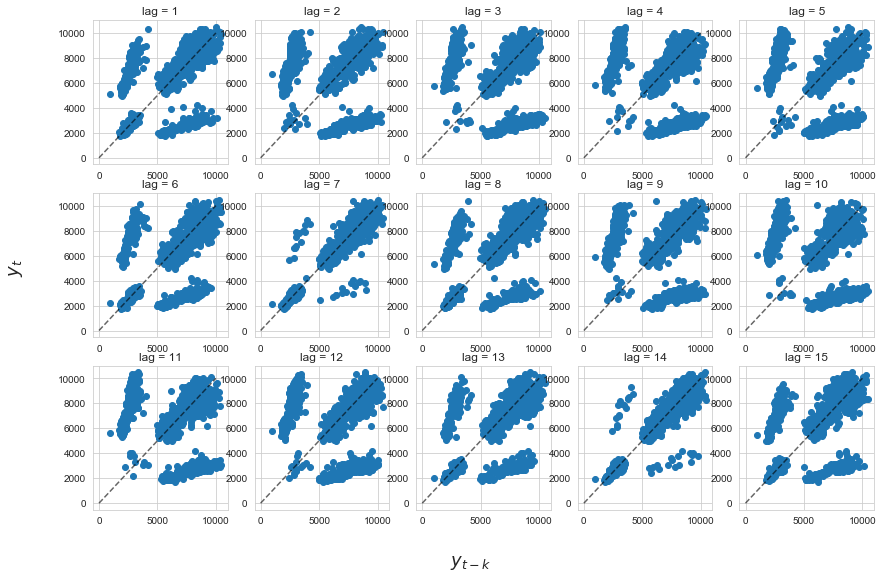

In [414]:
fig,ax = plt.subplots(3, 5, figsize = (14,9))

for i in range(1,16):
    plot_lag(df, 'volume_A', i, ax[(i-1)//5, (i-1)%5])
    
fig.text(0.5, 0.04, '$y_{t-k}$', ha='center',fontsize=18)
fig.text(0.04, 0.5, '$y_t$', va='center', rotation='vertical',fontsize=18)

plt.show()    

> Like I susspected, there is a period every 7 days. "*There is seasonality in the data with a frequency of  7
  time steps*."

In [401]:
# Make a function to calculate the autocorrelation

def get_autocorr(df, feature, lag):
    df = make_lag_df(df, feature, lag)
    mean_y = df[feature].mean()
    
    
    
    y_ts = df[feature].values
    y_lags = df.dropna()[feature + '_lag'].values
    
    numerator = np.sum((y_ts[lag:] - mean_y)*(y_lags - mean_y))
    denom = np.sum(np.power(y_ts - mean_y,2))
    
    return numerator/denom

In [411]:
# For lags 1-15
lags = np.arange(1,20,1)

print(lags)
print([get_autocorr(df,'volume_A',lag) for lag in lags])

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[0.4480291215645049, -0.18025136922978094, -0.3159998493425046, -0.3154384532538436, -0.17908724277107657, 0.4413589336320367, 0.9317856537521739, 0.4401423493858864, -0.1828444094092627, -0.320317502584424, -0.32407936491261324, -0.1801265901816006, 0.43793208025042263, 0.916835577623049, 0.4353996342516617, -0.1815901024003796, -0.32096713633730606, -0.3211300402435445, -0.18216594111202547]


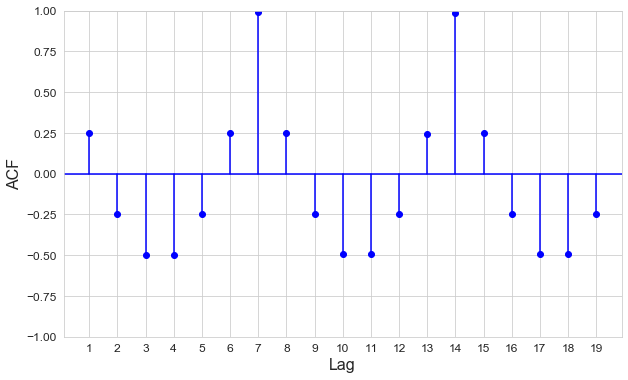

In [415]:
plt.figure(figsize=(10,6))

plt.ylim(-1,1)


plt.axhline(y=0, xmin=0, xmax=20, color = "blue")

plt.scatter(np.arange(1,20,1), 
           [get_autocorr(df,'day_of_week',lag) for lag in lags], c='b')

for i in np.arange(1,20,1):
    plt.plot(i*np.ones(2),[0, get_autocorr(df,'day_of_week',i)],'b')

plt.xlabel("Lag", fontsize=16)
plt.ylabel("ACF", fontsize=16)

plt.xticks(np.arange(1,20,1), fontsize=12)
plt.yticks(fontsize=12)

plt.show()

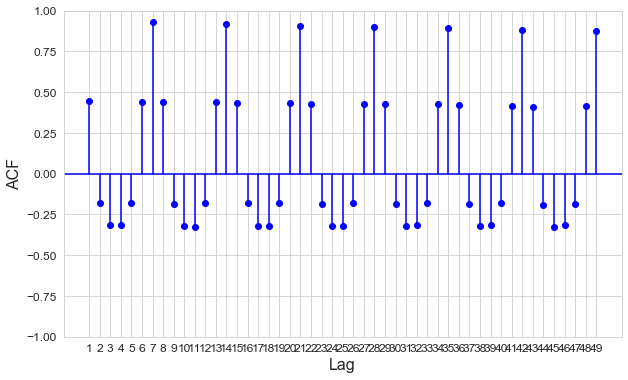

In [431]:
plt.figure(figsize=(10,6))

plt.ylim(-1,1)


plt.axhline(y=0, xmin=0, xmax=50, color = "blue")

plt.scatter(np.arange(1,50,1), 
           [get_autocorr(df,'volume_A',lag) for lag in np.arange(1,50,1)], c='b')

for i in np.arange(1,50,1):
    plt.plot(i*np.ones(2),[0, get_autocorr(df,'volume_A',i)],'b')

plt.xlabel("Lag", fontsize=16)
plt.ylabel("ACF", fontsize=16)

plt.xticks(np.arange(1,50,1), fontsize=12)
plt.yticks(fontsize=12)

plt.show()

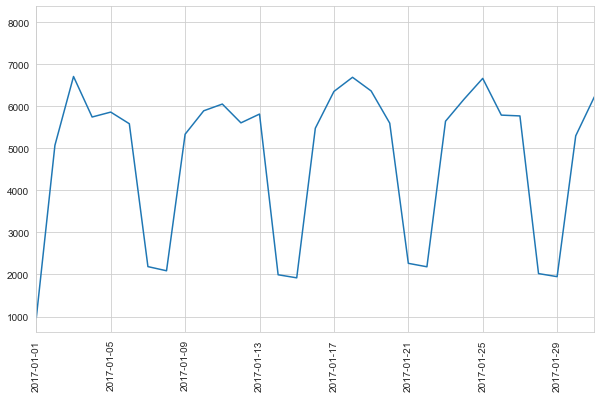

In [433]:
plt.figure(figsize=(10,6))

plt.plot(df['date_val'][(df['date_val'] >= pd.Timestamp(2017,1,1))&(df['date_val'] <= pd.Timestamp(2017,12,31))], 
            df['volume_A'][(df['date_val'] >= pd.Timestamp(2017,1,1))&(df['date_val'] <= pd.Timestamp(2017,12,31))])

plt.xticks(rotation=90)

plt.xlim(pd.Timestamp(2017,1,1), pd.Timestamp(2017,1,31))
plt.show()

### Let's try out the Exponential Smoothing to forecast what will happen later

In [4]:
# First copy the data frame
df_copy = df.copy()

In [40]:
# only looking at 2017 data:

df_2017 = df[(df['date_val'] >= pd.Timestamp(2017,1,1))&(df['date_val'] <= pd.Timestamp(2017,12,31))]

# Get train and test data. Test on the last month of the data:

df_train = df_2017[:-31]
df_test = df_2017.drop(df_train.index)

In [41]:
len(df_test)

31

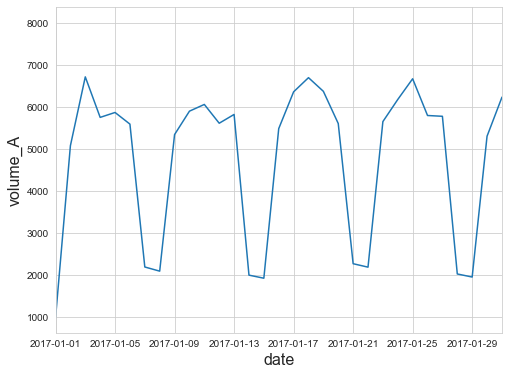

In [42]:
# Plot it, to see what it looks like:

purchase = 'volume_A'

plt.figure(figsize = (8,6))

plt.plot(df_train['date_val'], df_train[purchase])

plt.xlabel("date", fontsize=16)
plt.ylabel(purchase, fontsize=16)

plt.xlim(pd.Timestamp(2017,1,1), pd.Timestamp(2017,1,31))

plt.show()

I had previously seen that there is **seasonality** every 7 days, so the `seasonal_periods = 7`

In [43]:
### Make the model ###

# In the additive model set seasonal to 'add'
add_mod = ExponentialSmoothing(df_train[purchase].values, seasonal_periods=7, seasonal='add')

# In the multiplicative model set seasonal to 'mul'
mul_mod = ExponentialSmoothing(df_train[purchase].values, seasonal_periods=7, seasonal='mul')


In [89]:
### Fit the model ###

# The Additive Model:

add_mod_fit = add_mod.fit()

# add_mod_fit = add_mod.fit(smoothing_level=.6,
#                          smoothing_slope=.7,
#                          smoothing_seasonal=.2)


# The multiplicative model

mul_mod_fit = mul_mod.fit()

# mul_mod_fit = add_mod.fit(smoothing_level=.6,
#                          smoothing_slope=.7,
#                          smoothing_seasonal=.2)



In [90]:
(add_mod_fit.params)


{'smoothing_level': 0.07340554264414893,
 'smoothing_slope': nan,
 'smoothing_seasonal': 0.062409781942170624,
 'damping_slope': nan,
 'initial_level': 2344.7791154279867,
 'initial_slope': nan,
 'initial_seasons': array([-388.44205209, 3152.81434705, 3908.26899102, 3934.69567706,
        3795.89012913, 3472.53902544, -181.61065015]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [91]:
(mul_mod_fit.params)

{'smoothing_level': 0.08216107235336677,
 'smoothing_slope': nan,
 'smoothing_seasonal': 0.0,
 'damping_slope': nan,
 'initial_level': 2098.3756873346942,
 'initial_slope': nan,
 'initial_seasons': array([0.9600362 , 2.63103493, 2.98116714, 2.99215911, 2.94253056,
        2.7829971 , 0.98549688]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

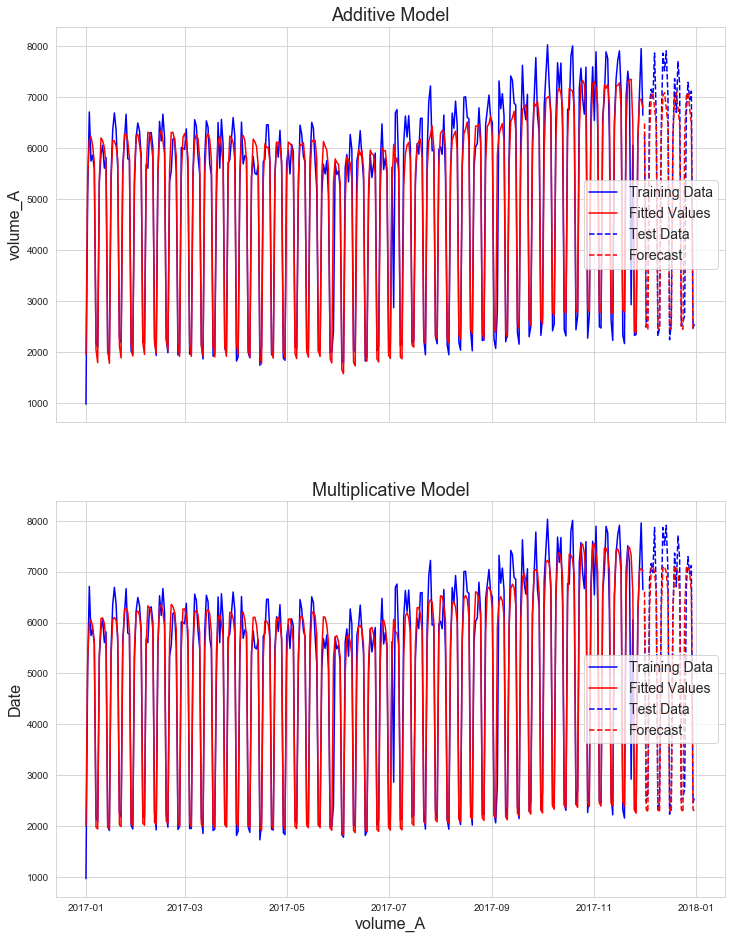

In [92]:
### Plot Them ###

fig, ax = plt.subplots(2, 1, figsize=(12,16), sharex=True, sharey=True)

## The additive model ##

# training data
ax[0].plot(df_train['date_val'], df_train[purchase], 
           'b-', label="Training Data")

# fitted values
ax[0].plot(df_train['date_val'], add_mod_fit.fittedvalues, 
           'r-', label="Fitted Values")


# The test data
ax[0].plot(df_test['date_val'], df_test[purchase],
            'b--', label="Test Data")

ax[0].plot(df_test['date_val'], add_mod_fit.forecast(len(df_test)),
           'r--', label="Forecast")

ax[0].legend(fontsize=14)

ax[0].set_title("Additive Model",fontsize=18)
ax[0].set_ylabel(purchase,fontsize=16)



## The multiplicative model ##

# training data
ax[1].plot(df_train['date_val'], df_train[purchase], 
           'b-', label="Training Data")

# fitted values
ax[1].plot(df_train['date_val'], mul_mod_fit.fittedvalues, 
           'r-', label="Fitted Values")

# The test data
ax[1].plot(df_test['date_val'], df_test[purchase],
            'b--', label="Test Data")
ax[1].plot(df_test['date_val'], mul_mod_fit.forecast(len(df_test)),
           'r--', label="Forecast")

ax[1].legend(fontsize=14)

ax[1].set_title("Multiplicative Model",fontsize=18)
ax[1].set_ylabel("Date",fontsize=16)
ax[1].set_xlabel(purchase,fontsize=16)

plt.show()







#### Forecast Errors: 

Calculate `rmse`:

In [93]:
def get_rmse(pred, actual):
    res = pred - actual
    #print(res)
    return np.sqrt(np.sum(np.power(res,2))/len(res))

In [97]:
get_rmse(add_mod_fit.forecast(len(df_test)), df_test[purchase])

781.870425866441

In [98]:
get_rmse(add_mod_fit.fittedvalues, df_train[purchase])

539.7215790173136

In [101]:
get_rmse(mul_mod_fit.forecast(len(df_test)), df_test[purchase])

755.5453238878099

In [99]:
get_rmse(mul_mod_fit.fittedvalues, df_train[purchase])

514.8868479748659

How accurately can you predict what will happen in 2019 at the monthly and yearly levels?

In [112]:
# looking at 2017 and 2018 data:

df_2017_2018 = df[(df['date_val'] >= pd.Timestamp(2017,1,1))&(df['date_val'] <= pd.Timestamp(2018,12,31))]

# Get train and test data. Test on the last month of the data:

df_train = df_2017_2018.copy()
df_test = df.drop(df_train.index)

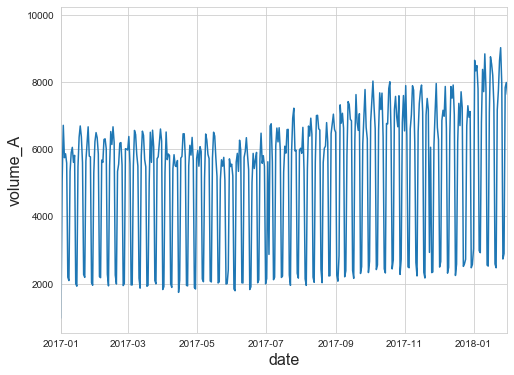

In [120]:
# Plot it, to see what it looks like:

purchase = 'volume_A'

plt.figure(figsize = (8,6))

plt.plot(df_train['date_val'], df_train[purchase])

plt.xlabel("date", fontsize=16)
plt.ylabel(purchase, fontsize=16)

plt.xlim(pd.Timestamp(2017,1,1), pd.Timestamp(2018,1,31))

plt.show()

Remember I figured out that on a yearly level the data tends to rise in the early months, then go down by the end of the year. So `seasonal_periods=12`.

In [127]:
# In the additive model set seasonal to 'add'
add_mod = ExponentialSmoothing(df_train[purchase].values, seasonal_periods=365, seasonal='add')

# In the multiplicative model set seasonal to 'mul'
mul_mod = ExponentialSmoothing(df_train[purchase].values, seasonal_periods=365, seasonal='mul')

In [128]:
### Fit the model ###

# The Additive Model:

add_mod_fit = add_mod.fit()

# add_mod_fit = add_mod.fit(smoothing_level=.6,
#                          smoothing_slope=.7,
#                          smoothing_seasonal=.2)


# The multiplicative model

mul_mod_fit = mul_mod.fit()

# mul_mod_fit = add_mod.fit(smoothing_level=.6,
#                          smoothing_slope=.7,
#                          smoothing_seasonal=.2)



/Users/daniellaroberts/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


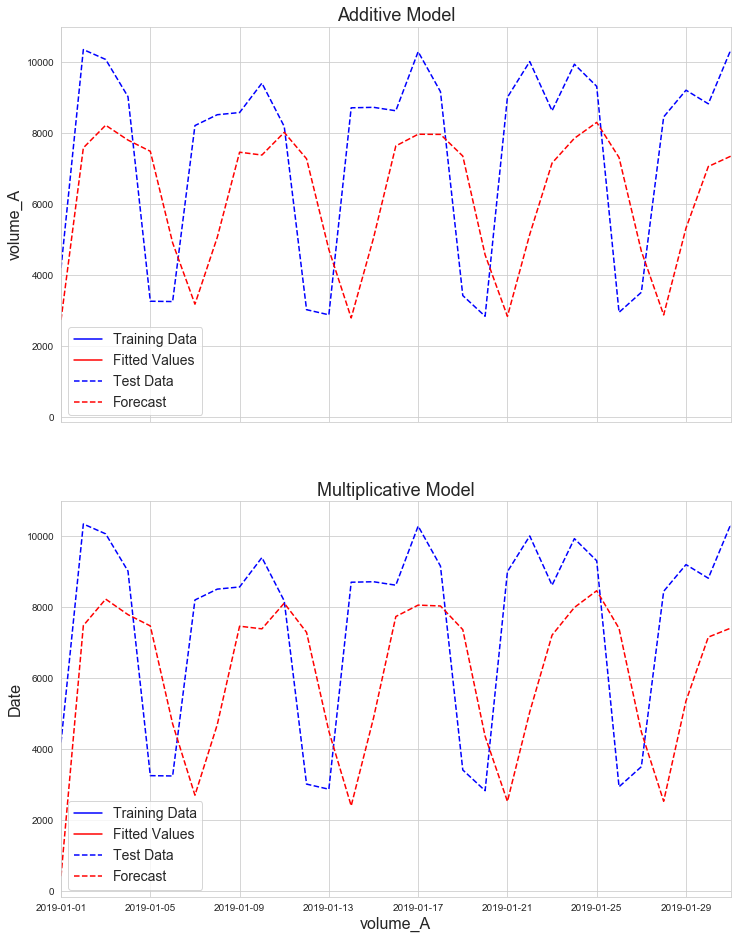

In [131]:
### Plot Them ###

fig, ax = plt.subplots(2, 1, figsize=(12,16), sharex=True, sharey=True)

## The additive model ##

# training data
ax[0].plot(df_train['date_val'], df_train[purchase], 
           'b-', label="Training Data")

# fitted values
ax[0].plot(df_train['date_val'], add_mod_fit.fittedvalues, 
           'r-', label="Fitted Values")


# The test data
ax[0].plot(df_test['date_val'], df_test[purchase],
            'b--', label="Test Data")

ax[0].plot(df_test['date_val'], add_mod_fit.forecast(len(df_test)),
           'r--', label="Forecast")

ax[0].legend(fontsize=14)

ax[0].set_title("Additive Model",fontsize=18)
ax[0].set_ylabel(purchase,fontsize=16)



## The multiplicative model ##

# training data
ax[1].plot(df_train['date_val'], df_train[purchase], 
           'b-', label="Training Data")

# fitted values
ax[1].plot(df_train['date_val'], mul_mod_fit.fittedvalues, 
           'r-', label="Fitted Values")

# The test data
ax[1].plot(df_test['date_val'], df_test[purchase],
            'b--', label="Test Data")
ax[1].plot(df_test['date_val'], mul_mod_fit.forecast(len(df_test)),
           'r--', label="Forecast")

ax[1].legend(fontsize=14)

ax[1].set_title("Multiplicative Model",fontsize=18)
ax[1].set_ylabel("Date",fontsize=16)
ax[1].set_xlabel(purchase,fontsize=16)

plt.xlim(pd.Timestamp(2019,1,1), pd.Timestamp(2019,1,31))

plt.show()


In [132]:
get_rmse(add_mod_fit.forecast(len(df_test)), df_test[purchase])

3243.611082535574